# CSCI4700 – Data Mining - Assignment 2

### Part 1 - Distance and Attribute Dependence ###

### Discretization, One-Hot Encoding, and Hamming & Jaccard Distance Part

In [32]:
import numpy as np
import random as rnd
from scipy import stats

# Defining the files containing the dataset
dataset_file1 = "adult.data"
dataset_file2 = "adult.test"

# Opening the files and read their contents
file1 = open(dataset_file1, "r")
content1 = file1.readlines()
file2 = open(dataset_file2, "r")
content2 = file2.readlines()[1::]

# Concatenating the file contents into 1
records = content1 + content2

# Removing periods
for index in range(len(records)):
  records[index] = records[index].replace('.', '')

# Addding an identifier to each record
for index in range(len(records)):
  records[index] = f"{index + 1}, {records[index]}"

# Excluding records with missing ('?') data
records = [record for record in records if '?' not in record]

# Converting the records into a 2D list (matrix) for data manipulation
matrix = []
for record in records:
  elements = record.split(",")
  # Skipping records with different attribute amounts
  if (len(elements) != 16):
    continue
  elements = [element.strip() for element in elements]
  elements = [int(element) if element.isnumeric() else element for element in elements]
  matrix.append(elements)

# Initializing a list for attribute mappings
attribute_mappings = [0]
for attribute_index in range(1, 16):
  attribute_mappings.append({})
  if isinstance(matrix[0][attribute_index], int):
    # Applying equal-frequency binning for continuous attributes
    matrix.sort(key=lambda x: x[attribute_index])

    for group in range(5):
      start_index = group * len(matrix) // 5
      end_index = (group + 1) * len(matrix) // 5 - 1
      range_key = f"{group}: {matrix[start_index][attribute_index]}-{matrix[end_index][attribute_index]}"
      attribute_mappings[-1][range_key] = group
      for record_index in range(start_index, end_index + 1):
        matrix[record_index][attribute_index] = group

  else:
    # Converting discrete attributes to integer mappings
    unique_index = 0
    for record in matrix:
      attribute_value = record[attribute_index]
      if attribute_value not in attribute_mappings[-1]:
        attribute_mappings[-1][attribute_value] = unique_index
        unique_index += 1
      record[attribute_index] = attribute_mappings[-1][attribute_value]

# Converting the dataset to one-hot encoded format
for record_index in range(len(matrix)):
  for attribute_index in range(1, 16):
    # Initializing an array with zeros
    one_hot_vector = np.zeros(len(attribute_mappings[attribute_index]))
    # Setting the appropriate index to 1
    one_hot_vector[matrix[record_index][attribute_index]] = 1
    # Updating the record with the one-hot encoded vector
    matrix[record_index][attribute_index] = one_hot_vector

# Updating the attribute mappings to one-hot encoded vectors
for attribute_index in range(1, 16):
  for key, value in attribute_mappings[attribute_index].items():
    # Creating a one-hot encoded vector for the attribute value
    one_hot_vector = np.zeros(len(attribute_mappings[attribute_index]))
    # Assigning 1 to the index corresponding to the attribute value
    one_hot_vector[value] = 1
    # Updating the mapping with the one-hot encoded vector
    attribute_mappings[attribute_index][key] = one_hot_vector

# Extracting a random subset of 100 data points from the dataset
subset_indices = rnd.sample(range(len(matrix)), 100)

# Preparing to store the pairwise distance calculations
calculated_distances = []

# Determining the distances between each pair in the random subset
for first_index in subset_indices:
  for second_index in subset_indices:
    if first_index >= second_index:
      # Skipping duplicates and comparison of the same data points
      continue
    # Tracking the number of attributes that match or differ
    union_of_attributes = 0
    intersection_of_attributes = 0
    # Comparing attributes between two data points
    for attribute in range(1, 16):
      if np.array_equal(matrix[first_index][attribute], matrix[second_index][attribute]):
        union_of_attributes += 2
      else:
        intersection_of_attributes += 1
        union_of_attributes += 1
    # Calculating the Hamming distance and Jaccard similarity index
    hamming = 15 - intersection_of_attributes
    jaccard = intersection_of_attributes / union_of_attributes
    # Recording the distances for the pair
    calculated_distances.append((first_index, second_index, hamming, jaccard))

# Organizing the pairs based on Hamming distance and display the closest and most distant points
calculated_distances.sort(key=lambda pair: pair[2])

index = 0
while index < len(calculated_distances) and calculated_distances[index][2] == calculated_distances[0][2]:
  print(f"Closest by Hamming distance: {matrix[calculated_distances[index][0]][0]} and {matrix[calculated_distances[index][1]][0]} with distance {calculated_distances[index][2]}")
  index += 1

index = len(calculated_distances) - 1
while index >= 0 and calculated_distances[index][2] == calculated_distances[-1][2]:
  print(f"Farthest by Hamming distance: {matrix[calculated_distances[index][0]][0]} and {matrix[calculated_distances[index][1]][0]} with distance {calculated_distances[index][2]}")
  index -= 1

# Organizing the pairs based on Jaccard distance and display the closest and most distant points
calculated_distances.sort(key=lambda pair: pair[3], reverse=True)

index = 0
while index < len(calculated_distances) and calculated_distances[index][3] == calculated_distances[0][3]:
  print(f"Closest by Jaccard distance: {matrix[calculated_distances[index][0]][0]} and {matrix[calculated_distances[index][1]][0]} with similarity {calculated_distances[index][3]}")
  index += 1

index = len(calculated_distances) - 1
while index >= 0 and calculated_distances[index][3] == calculated_distances[-1][3]:
  print(f"Farthest by Jaccard distance: {matrix[calculated_distances[index][0]][0]} and {matrix[calculated_distances[index][1]][0]} with similarity {calculated_distances[index][3]}")
  index -= 1

Closest by Hamming distance: 8948 and 13242 with distance 0
Closest by Hamming distance: 8948 and 43510 with distance 0
Closest by Hamming distance: 8948 and 6793 with distance 0
Closest by Hamming distance: 8948 and 2064 with distance 0
Closest by Hamming distance: 27983 and 17272 with distance 0
Farthest by Hamming distance: 23098 and 26543 with distance 14
Farthest by Hamming distance: 15111 and 9787 with distance 14
Closest by Jaccard distance: 8948 and 13242 with similarity 1.0
Closest by Jaccard distance: 8948 and 43510 with similarity 1.0
Closest by Jaccard distance: 8948 and 6793 with similarity 1.0
Closest by Jaccard distance: 8948 and 2064 with similarity 1.0
Closest by Jaccard distance: 27983 and 17272 with similarity 1.0
Farthest by Jaccard distance: 23098 and 26543 with similarity 0.034482758620689655
Farthest by Jaccard distance: 15111 and 9787 with similarity 0.034482758620689655


### Conducting Chi-Squared Independency Test Part

In [10]:
def compute_chi_square(first_attribute: int, second_attribute: int) -> float:
  # Counting occurrences for each category within the attributes
  frequency_count_first = {}
  frequency_count_second = {}
  joint_frequencies = {}

  for record_index in range(len(matrix)):
    first_attribute_value = str(matrix[record_index][first_attribute])
    second_attribute_value = str(matrix[record_index][second_attribute])

    if first_attribute_value not in frequency_count_first:
      frequency_count_first[first_attribute_value] = 1
    else:
      frequency_count_first[first_attribute_value] += 1

    if second_attribute_value not in frequency_count_second:
      frequency_count_second[second_attribute_value] = 1
    else:
      frequency_count_second[second_attribute_value] += 1

    combined_key = first_attribute_value + second_attribute_value
    if combined_key not in joint_frequencies:
      joint_frequencies[combined_key] = 1
    else:
      joint_frequencies[combined_key] += 1

  # Calculating the chi-square statistic
  chi_square_total = 0
  for first_category, first_frequency in frequency_count_first.items():
    for second_category, second_frequency in frequency_count_second.items():
      expected_frequency = first_frequency * second_frequency / len(matrix)
      combined_key = first_category + second_category
      if combined_key in joint_frequencies:
        observed_frequency = joint_frequencies[combined_key]
      else:
        observed_frequency = 0
      chi_square_total += ((observed_frequency - expected_frequency) ** 2) / expected_frequency

  return chi_square_total

In [11]:
# Calculating the chi-squared statistic for 'education' (attribute 4) and 'race' (attribute 9)
chi_squared_value = compute_chi_square(4, 9)
print(f"Chi-squared statistic: {chi_squared_value}")

# Calculating the p-value from the chi-squared distribution
degrees_of_freedom = (len(attribute_mappings[4]) - 1) * (len(attribute_mappings[9]) - 1)
p_value = stats.distributions.chi2.sf(chi_squared_value, degrees_of_freedom)
print(f"P-value: {p_value}")

# Calculating the chi-squared statistic for 'workclass' (attribute 2) and 'marital-status' (attribute 6)
chi_squared_value = compute_chi_square(2, 6)
print(f"Chi-squared statistic: {chi_squared_value}")

# Calculating the p-value from the chi-squared distribution
degrees_of_freedom = (len(attribute_mappings[2]) - 1) * (len(attribute_mappings[6]) - 1)
p_value = stats.distributions.chi2.sf(chi_squared_value, degrees_of_freedom)
print(f"P-value: {p_value}")

Chi-squared statistic: 962.9873059664582
P-value: 5.827307092250789e-163
Chi-squared statistic: 1626.4195745565535
P-value: 0.0


### Part 2 - Dimensionality Reduction

In [31]:
import numpy as np
import pandas as pd

# Extracting 'Race' and 'Education' data from the matrix
race_data = [record[9] for record in matrix]
education_data = [record[4] for record in matrix]

# Concatenating the race and education data horizontally to form the encoded_data
encoded_data = np.hstack((race_data, education_data))

# Creating a DataFrame from the extracted data
data = pd.DataFrame({
    'Race': race_data,
    'Education': education_data
})

# Function to perform PCA from scratch
def pca_from_scratch(X, num_components):
    # Step 1: Standardizing the data to have zero mean
    X_standardized = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
    
    # Step 2: Calculating the covariance matrix
    covariance_matrix = np.cov(X_standardized, rowvar=False)
    
    # Step 3: Computing the eigenvalues and eigenvectors for the covariance matrix
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
    
    # Step 4: Sorting the eigenvalues and corresponding eigenvectors in descending order
    sorted_idx = np.argsort(eigenvalues)[::-1]
    eigenvalues_sorted = eigenvalues[sorted_idx]
    eigenvectors_sorted = eigenvectors[:, sorted_idx]
    
    # Step 5: Selecting the top eigenvalues
    selected_eigenvectors = eigenvectors_sorted[:, :num_components]
    
    # Step 6: Transforming original data using the eigenvectors corresponding to top eigenvalues
    X_reduced = np.dot(X_standardized, selected_eigenvectors)
    
    return X_reduced, eigenvalues_sorted

# Applying PCA to the one-hot encoded data to reduce it to 1 principal component
X_reduced, eigenvalues_sorted = pca_from_scratch(encoded_data, num_components=1)

# Take a random sample of 100 points from the reduced data
random_sample_indices = np.random.choice(X_reduced.shape[0], size=100, replace=False)
random_sample = X_reduced[random_sample_indices, :]

# Calculate the variance explained by the first principal component
total_variance = np.sum(eigenvalues_sorted)
explained_variance_ratio = eigenvalues_sorted[0] / total_variance

# Print the results
print("100 random samples from the reduced data:", random_sample.flatten())
print("Variance explained by the first principal component:", explained_variance_ratio)

100 random samples from the reduced data: [-0.53937462 -0.76112279 -0.53937462  3.74999696  3.62014954  2.99165956
 -0.47761201 -0.47761201 -0.47761201  2.99165956 -0.53937462 -0.47761201
 -0.47761201 -0.76112279 -0.52809926 -0.52809926 -0.52809926  3.6797318
 -0.47761201 -0.76112279 -0.53937462 -0.53937462 -0.43134374 -0.47761201
  3.6797318   3.36651655 -0.731245   -0.47761201 -0.41802975 -0.73693805
 -0.71282756 -0.731245   -0.41802975 -0.54231264 -0.47761201 -0.47761201
  2.99165956 -0.52809926 -0.3477646  -0.53937462  3.55838693 -0.731245
 -0.53937462  3.36651655 -0.71282756 -0.43134374 -0.76112279 -0.43134374
 -0.71282756 -0.731245   -0.47761201 -0.53937462 -0.53937462 -0.33809312
 -0.53937462 -0.53937462 -0.731245   -0.47761201  3.55838693 -0.47761201
 -0.53937462 -0.47761201 -0.47761201 -0.54231264 -0.47761201 -0.64035896
  3.62014954 -0.731245   -0.43134374 -0.731245   -0.53937462 -0.53937462
 -0.47761201 -0.53937462  2.99165956 -0.47761201 -0.731245   -0.47761201
 -0.47761201

### Part 3 - Graph Mining

### Part 3.1 - Diameter

In [2]:
import networkx as nx
from collections import defaultdict, deque

# Reading edges from a file
with open('Ecoli.txt', 'r') as file:
    edges = [tuple(map(int, line.split())) for line in file.readlines()]

# Creating the undirected graph from edges
graph = defaultdict(list)
for u, v in edges:
    graph[u].append(v)
    graph[v].append(u)

# Listing of all unique nodes
nodes_list = list(graph.keys())

# Implementing BFS to calculate distances from a single node
def bfs(v, adj_list):
    q = deque([v])
    dists = {v: 0}  # Dictionary to track distances from the node v

    while q:
        u = q.popleft()

        for to in adj_list[u]:
            if to not in dists:  # If 'to' has not been visited
                dists[to] = dists[u] + 1
                q.append(to)
    
    return dists

# Function to compute the diameter using the custom-based BFS
def compute_diameter(graph, nodes):
    max_diameter = 0
    for node in nodes:
        distances = bfs(node, graph)
        if distances:
            furthest_node_distance = max(distances.values())
            max_diameter = max(max_diameter, furthest_node_distance)
    return max_diameter

# Calculating and printing the diameter
diameter = compute_diameter(graph, nodes_list)
print("Diameter of the graph:", diameter)

Diameter of the graph: 9


### Part 3.2 - Degree Distribution

Degree Distribution: {1: 0.3539936102236422, 2: 0.2268370607028754, 3: 0.1412140575079872, 4: 0.09520766773162939, 5: 0.03642172523961661, 6: 0.06261980830670927, 7: 0.019808306709265176, 8: 0.008306709265175719, 9: 0.011501597444089457, 10: 0.003194888178913738, 11: 0.008306709265175719, 12: 0.003194888178913738, 13: 0.0012779552715654952, 14: 0.0012779552715654952, 15: 0.0019169329073482429, 16: 0.0012779552715654952, 18: 0.0006389776357827476, 19: 0.0006389776357827476, 20: 0.0012779552715654952, 22: 0.0006389776357827476, 23: 0.0012779552715654952, 25: 0.0012779552715654952, 30: 0.0006389776357827476, 31: 0.0006389776357827476, 33: 0.0019169329073482429, 34: 0.0012779552715654952, 36: 0.0012779552715654952, 40: 0.0006389776357827476, 45: 0.0006389776357827476, 46: 0.0006389776357827476, 49: 0.0006389776357827476, 54: 0.0006389776357827476, 55: 0.0006389776357827476, 83: 0.0006389776357827476, 87: 0.0006389776357827476, 90: 0.0012779552715654952, 97: 0.0006389776357827476, 115: 0.00

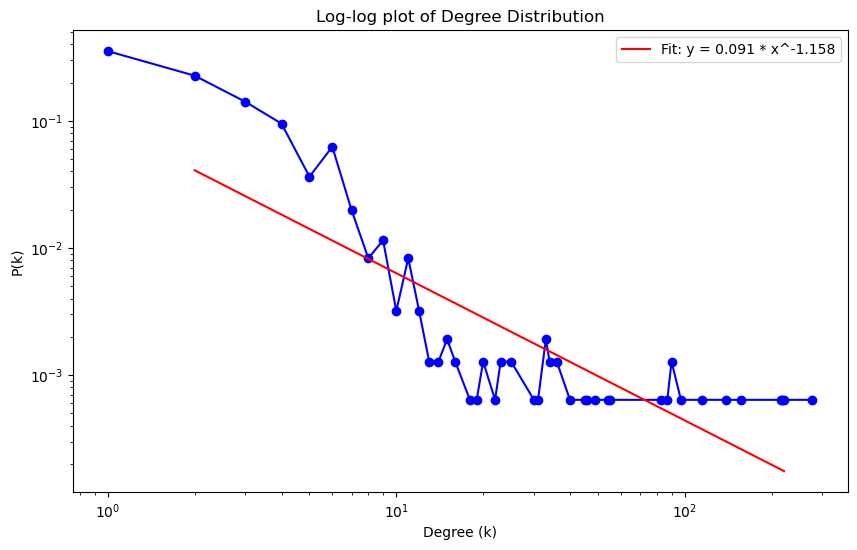

Slope (Gamma) of the line: 1.158272386509981


In [5]:
import matplotlib.pyplot as plt
import numpy as np

n = len(nodes_list)
degrees = [0] * (n + 1)
max_deg = 0

# Counting each node's degree
for node, neighbors in graph.items():
    node_degree = len(neighbors)
    degrees[node_degree] += 1
    max_deg = max(max_deg, node_degree)

# Normalizing degrees to probabilities
x = []
y = []
degree_distribution = {}
for degree_count in range(max_deg + 1):
    if degrees[degree_count] > 0:
        prob = degrees[degree_count] / n
        x.append(degree_count)
        y.append(prob)
        degree_distribution[degree_count] = prob

# Printing the degree distribution
print("Degree Distribution:", degree_distribution)

# Plotting the degree distribution on a log-log scale
plt.figure(figsize=(10, 6))
plt.loglog(x, y, marker='o', linestyle='-', color='b')
plt.title('Log-log plot of Degree Distribution')
plt.xlabel('Degree (k)')
plt.ylabel('P(k)')

# Fitting a line to the log-log data excluding the first few and last few degree values
log_x = np.log(x[1:-1])  # Excluding the first and last data points
log_y = np.log(y[1:-1])
coefficients = np.polyfit(log_x, log_y, 1)
slope = coefficients[0]
intercept = coefficients[1]

# Plotting the fitted line
plt.plot(x[1:-1], np.exp(intercept) * (x[1:-1] ** slope), 'r-', label=f'Fit: y = {np.exp(intercept):.3f} * x^{slope:.3f}')
plt.legend()
plt.show()

# Printing the slope
print("Slope (Gamma) of the line:", -slope)  # The slope of the line is the exponent gamma

### Part 3.3 - Clustering Coefficient

In [17]:
cc_total = 0
n = len(nodes_list)  # Total number of nodes

for node in graph:
    neighbors = list(graph[node])
    if len(neighbors) < 2:  # If the node's degree is less than 2
        continue
  
     # Counting triangles
    triangle_count = 0
    for neighbor in neighbors:
        if node == neighbor:
            continue
        # Setting of neighbors of 'neighbor' for quick lookup
        neighbor_neighbors = set(graph[neighbor])
        for second_neighbor in neighbors:
            if second_neighbor in neighbor_neighbors:
                triangle_count += 1

    # Each triangle is counted three times, once at each vertex
    local_cc = triangle_count / (len(neighbors) * (len(neighbors) - 1))
    cc_total += local_cc

# Averaging the clustering coefficient
cc_average = cc_total / n
print("Average Clustering Coefficient:", cc_average)

Average Clustering Coefficient: 0.2116414939186282


### Part 3.4 - Page Rank 

In [7]:
import numpy as np

directed_graph_file = "Ecoli-directed.txt"

file = open(directed_graph_file, "r")
list_of_edges = file.readlines()

# Removing empty strings from the list of edge data
list_of_edges = [edge.split() for edge in list_of_edges if edge]
# Converting edge information to integers
list_of_edges = [[int(node) for node in edge] for edge in list_of_edges]
# Finding number of nodes
number_of_nodes = max(max(edge) for edge in list_of_edges) + 1
# Initializing the adjacency matrix with a default weight
adj_matrix = np.full((number_of_nodes, number_of_nodes), 0.1)
# Assigning a higher weight to the edges present in the list
adj_matrix[tuple(zip(*list_of_edges))] = 0.9

# Initializing the previous page rank and the current page rank
previous_page_rank = np.zeros(number_of_nodes)
current_page_rank = np.ones(number_of_nodes)
# Setting the convergence threshold
convergence_threshold = 0.001

# Iterating until converges
while np.linalg.norm(current_page_rank - previous_page_rank) > convergence_threshold:
  previous_page_rank = current_page_rank
  current_page_rank = np.dot(adj_matrix, previous_page_rank)

  # Normalizing the current page rank vector
  current_page_rank /= np.max(current_page_rank)

# Pairing each rank with its corresponding index (node number)
indexed_probability = [(probability, index) for index, probability in enumerate(current_page_rank)]
# Sorting the list in descending order of the page rank
indexed_probability.sort(reverse=True)

# Printing the top 10 genes based on their page rank
for i in range(10):
  print(indexed_probability[i][1])



378
76
655
1213
1194
64
706
1034
1128
665
